(13000, 7) (5572, 7) (13000,) (5572,)
[ 4.08110906e-01  6.92312594e-03  1.70628946e-05 -4.04061927e-01
 -4.10380169e-01 -2.08486703e-01  1.69589529e+00]
-34.74453851952332


,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
count,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000
mean,3.693262,26.983847,1470.392957,35.593231,-119.484929,1.896076,1.936448,0.398033
std,1.570045,11.431815,1162.944307,2.147712,1.980865,0.957902,1.122496,0.242479
min,0.499900,1.000000,3.000000,32.540000,-124.300000,0.149990,0.002547,0.000670
25%,2.537275,17.000000,811.000000,33.920000,-121.550000,1.154000,1.490197,0.311688
50%,3.468350,27.000000,1203.000000,34.240000,-118.450000,1.712000,1.905719,0.366856
75%,4.616100,36.000000,1781.000000,37.670000,-117.970000,2.432250,2.239138,0.435936
max,15.000100,51.000000,35682.000000,41.950000,-114.310000,5.000000,55.222222,14.194444


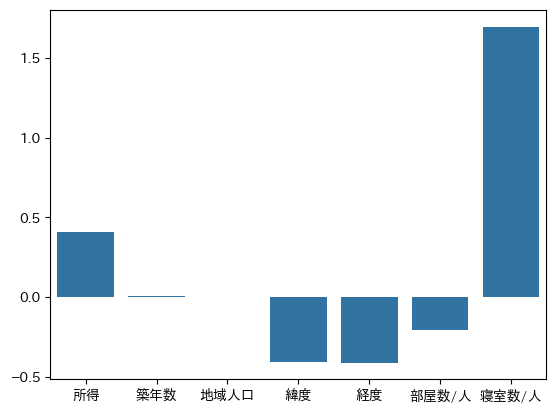

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib
#read_csv関数でcalifornia_housing_cleansing.csvを読み込む
df = pd.read_csv("sample_data/california_housing_cleansing.csv")
df.head()
#カラムUnnamedを削除する
df = df.drop(columns = ['Unnamed: 0'])
df.head()
#「california_housing_cleansing.csv」の全18572行のデータが取り込まれているか確認
df.shape

#予測モデルにインプットする説明変数Xは住宅価格以外の全列のデータ、目的変数yは住宅価格のデータ
X = df.drop(columns=['住宅価格']).to_numpy()
y = df['住宅価格'].to_numpy()
#train_test_split関数をインポート
from sklearn.model_selection import train_test_split
#train_test_split関数によって、比率7:3で学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#7:3に分割されたか、データ数を確認
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#linear_modelモジュールのLinearRegressionクラスをインポート
from sklearn.linear_model import LinearRegression
#インポートしたLinearRegressionクラスをインスタンス化
model = LinearRegression()
#学習データで学習(fit)を実行
model.fit(X_train, y_train)

#決定係数を用いて予測モデルの評価の実施、coreメソッドを利用して、決定係数を出力
#学習データを用いた決定係数と、テストデータを用いた決定係数をそれぞれ算出
model.score(X_train, y_train)
#テストデータを用いて決定係数を算出
model.score(X_test, y_test)

#ndarray形式でX_newという変数に保持
X_new = np.array([[8, 41, 500, 37, -120, 1, 0.2],
                  [2, 10, 2000, 38, -122, 1.5, 0.5],
                  [1, 25, 1000, 38, -121, 2, 1]])
#予測モデルを利用して、X_newから予測値を算出
model.predict(X_new)

#予測モデルをもとに、住宅価格を予測する計算式を作成
print(model.coef_)
print(model.intercept_)

sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'], y=model.coef_)
df.describe()

In [2]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c1cbd91191a3155aa3365d37b5bf726c957a4ba0944097c93a8319f1a3a8efd2
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib
